<a href="https://colab.research.google.com/github/andilugo/Analitica-de-datos-2/blob/main/4_4_3_CalculoMetricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller: Cálculo de métricas
En este taller se van a calcular las métricas de evaluación de un modelo de clasificación

##Lectura de datos
Se va a trabajar con el conjunto de datos de diabetes.

1.- Se necesita obtener todos los conjuntos necesarios para implementar el clasificador elegido

Positivos: 268
Negativos: 500


array([[<Axes: xlabel='preg', ylabel='preg'>,
        <Axes: xlabel='plas', ylabel='preg'>,
        <Axes: xlabel='pres', ylabel='preg'>,
        <Axes: xlabel='skin', ylabel='preg'>,
        <Axes: xlabel='insu', ylabel='preg'>,
        <Axes: xlabel='mass', ylabel='preg'>,
        <Axes: xlabel='pedi', ylabel='preg'>,
        <Axes: xlabel='age', ylabel='preg'>],
       [<Axes: xlabel='preg', ylabel='plas'>,
        <Axes: xlabel='plas', ylabel='plas'>,
        <Axes: xlabel='pres', ylabel='plas'>,
        <Axes: xlabel='skin', ylabel='plas'>,
        <Axes: xlabel='insu', ylabel='plas'>,
        <Axes: xlabel='mass', ylabel='plas'>,
        <Axes: xlabel='pedi', ylabel='plas'>,
        <Axes: xlabel='age', ylabel='plas'>],
       [<Axes: xlabel='preg', ylabel='pres'>,
        <Axes: xlabel='plas', ylabel='pres'>,
        <Axes: xlabel='pres', ylabel='pres'>,
        <Axes: xlabel='skin', ylabel='pres'>,
        <Axes: xlabel='insu', ylabel='pres'>,
        <Axes: xlabel='mass', ylab

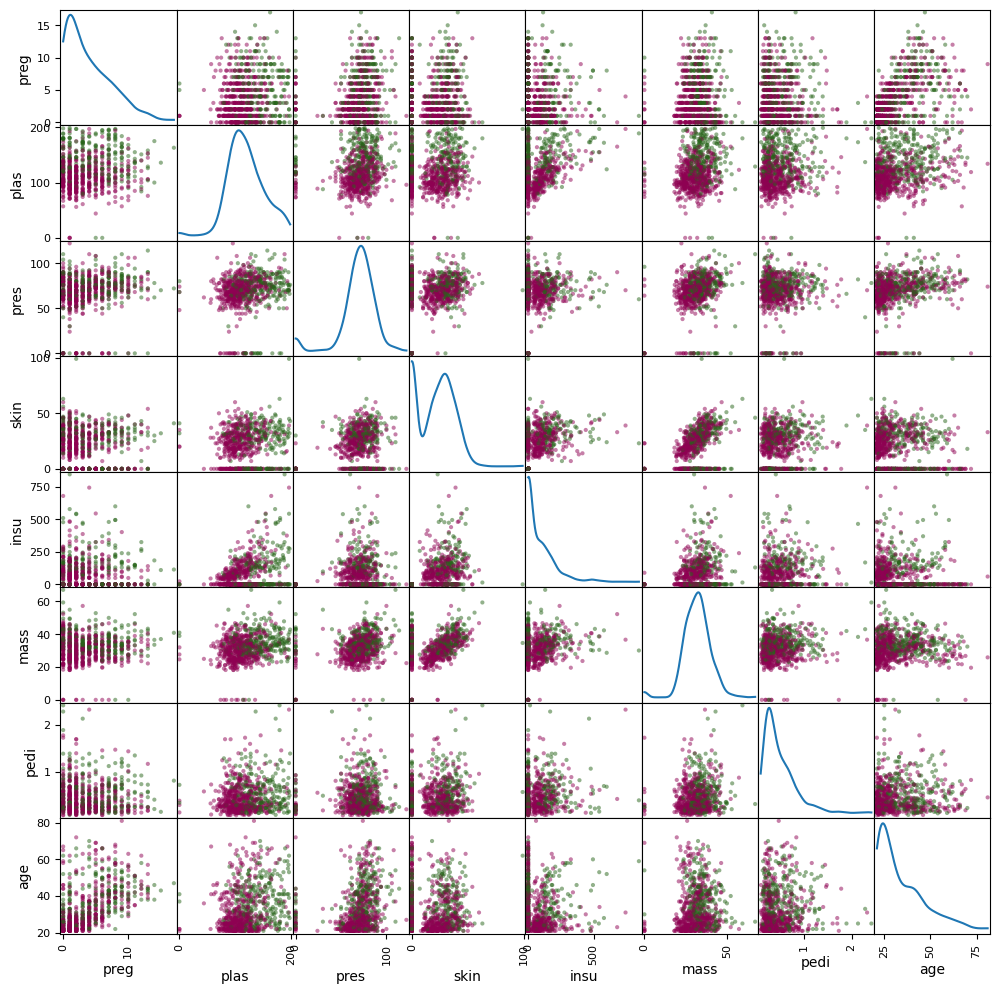

In [ ]:
import pandas as pd
from pandas import Series,DataFrame

setInicial=pd.read_csv('diabetes.csv')

#Recuperar nombres de las columnas de los atributos y la clase
atributosName=setInicial.columns[:-1]
atributoClase=setInicial.columns[-1]

#Datos de los atributos
dataGral=setInicial[atributosName]

#Datos de la clase (vector de elementos reales)
claseGral=setInicial[atributoClase]

#Nombre de las clases
clasesName=claseGral.drop_duplicates()
print("Positivos:",setInicial[setInicial['class']=='tested_positive']['class'].count())
print("Negativos:",setInicial[setInicial['class']=='tested_negative']['class'].count())

from pandas.plotting import scatter_matrix
color=claseGral.replace('tested_positive',1)
color=color.replace('tested_negative',0)
#print(color.values)

scatter_matrix(setInicial, c = color.values, cmap='PiYG',diagonal='kde',figsize = [12,12])

2.-  Separar train/test, generar modelo y clasificar

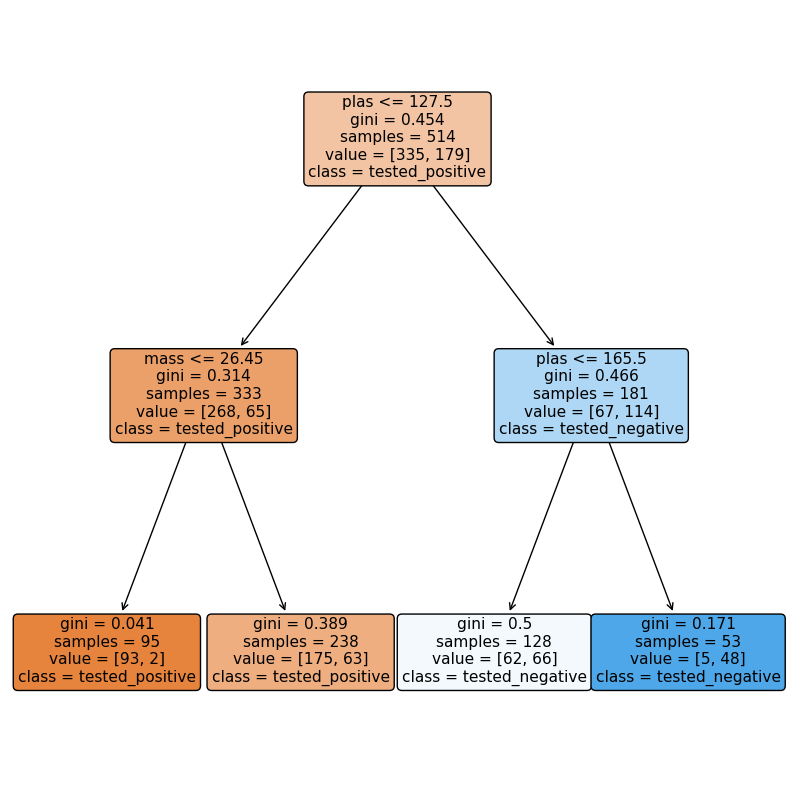

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

#Separar los datos
valoresTrain, valoresTest, clasesTrain, clasesTest= \
train_test_split(dataGral, claseGral, test_size=0.33, stratify= claseGral)

################## Clasificador ######################
clasificador = DecisionTreeClassifier(max_depth=2) #sirve para modificar el tamaño del árbol
#clasificador = DecisionTreeClassifier(min_samples_split=55) #sirve para modificar el tamaño del árbol


################## Modelo ###########################
modelo = clasificador.fit(valoresTrain, clasesTrain)

#Texto 
from sklearn.tree import export_text
arbol=export_text(modelo, feature_names=atributosName.to_list())
#print(arbol)

#Visual
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clasificador,feature_names=atributosName.to_list(),class_names=clasesName,filled=True, rounded=True)
plt.show()

#Definir la clase objetivo
objetivo='tested_positive'

################## Clasificar  #################
predict=modelo.predict(valoresTest)


##Análisis 1: Obtener métricas manualmente




Evaluar (manualmente)

In [ ]:
##Funciones para métricas y matriz de confusión
def confusionMatriz(real,hipotesis,clase):
  TP=FN=FP=TN=0#CONTEOS
  for x in range(len(real)):
    print(real[x],'--',hipotesis[x])
  return TP,FN,FP,TN
  #print(real)
  #print(hipotesis)
  #print(clase)

def metricas(tp,fn,fp,tn):
  p=r=f=0
  return p,r,f

#Matriz de confusion

#ejemplo#
#clasesTest=[1,1,0,0,0,1,1,1,1,1,0,1,0,1,0]
#predict=[1,0,0,0,1,1,1,0,0,1,1,0,0,0,1]

#Funciones
TP,FN,FP,TN=confusionMatriz(clasesTest.to_list(),predict,objetivo)
#TP,FN,FP,TN=confusionMatriz(clasesTest,predict,1)
P,R,F=metricas(TP,FN,FP,TN)

print("------- > Resultados:",objetivo," <-----")
print(TP,"\t",FN,"\n",FP,"\t",TN)
print("\nMétricas\nP: ",round(P,4),"\nR: ",round(R,4),"\nF1: ",round(F,4))


tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_positive -- tested_positive
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_positive -- tested_negative
tested_positive -- tested_positive
tested_positive -- tested_positive
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_positive -- tested_negative
tested_negative -- tested_negative
tested_positive -- tested_positive
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_positive -- tested_positive
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- tested_positive
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- tested_negative
tested_negative -- t

##Análisis 2: Funciones de evaluación

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

print("Matriz")
cm=confusion_matrix(clasesTest,predict,labels=['tasted_positive','tested_negative'])#la clase principal va primero 
print(cm)
print(cm[0,0])

#cmd=ConfusionMatrixDisplay(cm,display_labels=['tasted_positive','tested_negative'])
#cmd.plot()
print('Metricas')
print('Precisión: ', precision_score(clasesTest, predict,pos_label=objetivo, average='binary'))
print('Precisión gral promedio: ', precision_score(clasesTest, predict, average='macro'))
print('Precisión gral promedio ponderado: ', precision_score(clasesTest, predict, average='weighted'))

print('Recall clase positivo: ', recall_score(clasesTest, predict, pos_label=objetivo, average='binary'))
print('Recall gral promedio ponderado: ', recall_score(clasesTest, predict, average='weighted'))

print('F1 clase positivo: ', f1_score(clasesTest, predict, pos_label=objetivo, average='binary'))

print('\n Reporte de clasificación\n')
reporte=classification_report(clasesTest, predict, labels=['tested_positive','tested_negative'])
reporte2=classification_report(clasesTest, predict, labels=['tested_positive','tested_negative'], output_dict=True)

print(reporte)
print(reporte2)

Matriz
[[  0   0]
 [  0 123]]
0
Metricas
Precisión:  0.5882352941176471
Precisión gral promedio:  0.6987229102167183
Precisión gral promedio ponderado:  0.731782196923527
Recall clase positivo:  0.6741573033707865
Recall gral promedio ponderado:  0.7204724409448819
F1 clase positivo:  0.6282722513089005

 Reporte de clasificación

                 precision    recall  f1-score   support

tested_positive       0.59      0.67      0.63        89
tested_negative       0.81      0.75      0.78       165

       accuracy                           0.72       254
      macro avg       0.70      0.71      0.70       254
   weighted avg       0.73      0.72      0.72       254

{'tested_positive': {'precision': 0.5882352941176471, 'recall': 0.6741573033707865, 'f1-score': 0.6282722513089005, 'support': 89}, 'tested_negative': {'precision': 0.8092105263157895, 'recall': 0.7454545454545455, 'f1-score': 0.7760252365930599, 'support': 165}, 'accuracy': 0.7204724409448819, 'macro avg': {'precision':

##Análisis 3: Varios experimentos